<a href="https://colab.research.google.com/github/samipn/clustering_demos/blob/main/hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment (b): Hierarchical Clustering (Agglomerative)

This notebook demonstrates hierarchical agglomerative clustering on the Iris dataset, including a dendrogram and clustering quality metrics.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage

plt.rcParams["figure.figsize"] = (7, 6)

iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

X_scaled = StandardScaler().fit_transform(X)
print("Shape:", X_scaled.shape)


Shape: (150, 4)


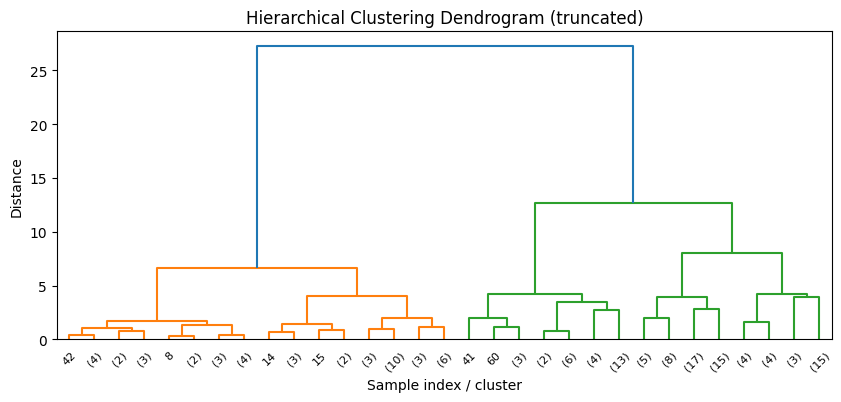

In [7]:
# Dendrogram using scipy (Ward linkage)
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 4))
dendrogram(Z, truncate_mode='level', p=4)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index / cluster")
plt.ylabel("Distance")
plt.show()


In [8]:
# Fit AgglomerativeClustering
n_clusters = 3
agg = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward'
)
labels = agg.fit_predict(X_scaled)

sil = silhouette_score(X_scaled, labels)
ari = adjusted_rand_score(y_true, labels)
nmi = normalized_mutual_info_score(y_true, labels)

print(f"Silhouette score: {sil:.3f}")
print(f"Adjusted Rand Index (vs true species): {ari:.3f}")
print(f"NMI (vs true species): {nmi:.3f}")

Silhouette score: 0.447
Adjusted Rand Index (vs true species): 0.615
NMI (vs true species): 0.675


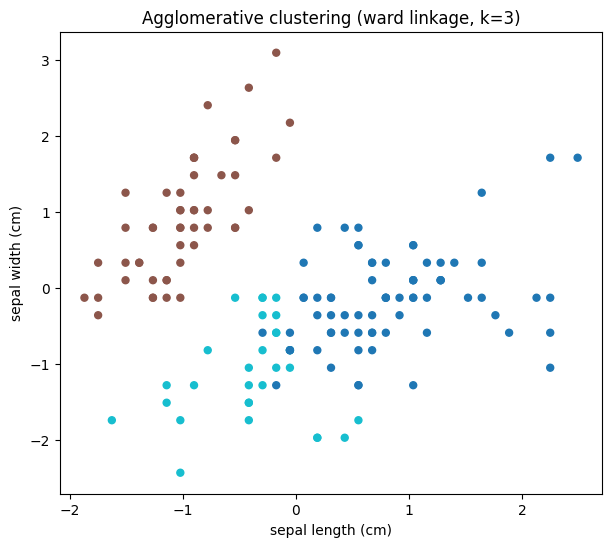

In [9]:
# 2D visualization with first two features
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=labels, cmap='tab10', s=25
)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Agglomerative clustering (ward linkage, k=3)")
plt.show()
